## Plot puv fluxes (baroclinic and barotropic energy)
adapted from diag_fluxes_lf.py

Plot snapshots of, e.g. low-pass filtered fields or avg.

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
#plt.rcParams['text.usetex'] = True
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import numpy as np
import gsw

KRYPTON = "/data0/project/vortex/lahaye/"
RUCHBA = "/net/ruchba/local/tmp/2/lahaye/"

In [3]:
simul = 'luckym2'
what = "ekint"
dostrflu = True # stream plot of baroclinic flux
it = "avg" #182 #436 #182 #    None or "avg"  will take avg, otherwise take lf at time inde it
doanim = True # quick-and-dirty patch

path_base = KRYPTON + 'DIAG/NRJ_fluxes/'
fil_iflux = path_base+simul+'_puv_fluxes_M2.?.nc'
fil_sflux = path_base+simul+'_bt_fluxes.?.nc'
fil_grd = KRYPTON + 'lucky_corgrd.nc'
st = 2  #ncr.subsamp_step

units = {"ekint":r"kJ/m$^2$", "flux":r"kw/m", "cterm":r"W/m$^2$",
        "divF":r"W/m$^2$", "dissip":r"W/m$^2$"}
vnam = {key:key for key in ["ekint", "flux", "cterm", "divF", "dissip"]}
vnam["cterm"] = "Ct"

#plotting parameters
dirpic = './pictures/videos/'
dosavefig = False

# plotting parameters
fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1500e3, 1500e3 #2*2*30*1852*np.array([1,1]) # extend in m
cmap = plt.get_cmap('gist_stern_r')  #
zlevs = [0,1000,2000,3500]
topocol = 'k'     # isobath. contour color
grdcol = 'gray'   # grid color

xm, ym = None, None #-32.28, 37.3
rlevs = []#[10, 20, 30] # nautical miles, radius around center to show


In [4]:
# Load data: grid & topo
doploth = True  # plot topo 

ncg = Dataset(fil_grd,'r')
slix = slice(1,2000,st)
sliy = slice(1,2000,st)
lon = ncg.variables['lon_rho'][sliy,:][:,slix]
lat = ncg.variables['lat_rho'][sliy,:][:,slix]
dx = .5*(np.mean(1./ncg.variables['pm'][:]) + np.mean(1./ncg.variables['pn'][:]) ) * st
Ny, Nx = lon.shape
if xm is not None:
    jm, im = np.unravel_index( ((lon-xm)**2 + (lat-ym)**2).argmin(), (Ny,Nx) )
    j1, j2 = jm + np.array([-1,1])*int(Lx/dx/2.)
    i1, i2 = im + np.array([-1,1])*int(Ly/dx/2.)
    print("jjs, iis:",j1,j2,i1,i2, "from parent: X",st)
else:
    j1, j2, i1, i2 = 0, Ny, 0, Nx
topo = ncg.variables['h'][sliy,:][:,slix][j1:j2,i1:i2]
lon = lon[j1:j2,i1:i2]
lat = lat[j1:j2,i1:i2]
print("loaded grid")
lonm, latm = lon.mean(axis=0), lat.mean(axis=1)
ny, nx = lon.shape
if rlevs is not None and len(rlevs)>0:
    rad = gsw.distance(np.c_[lon.ravel(),np.ones(nx*ny)*xm],np.c_[lat.ravel(),np.ones(nx*ny)*ym]).reshape(ny,nx)/1e3 # [km]
else:
    rad = None
print("min/max lon, lat:", lon.min(), lon.max(), lat.min(), lat.max())
# plot it
if doploth:
    vmin, vmax = round(topo.min()+50,-2), round(topo.max()-50,-2)
    levs = np.linspace(vmin, vmax, 21)
    fig = plt.figure(figsize=(8,7))
    ax = plt.gca()
    bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),\
            lat_0=lat.mean(),width=Lx,height=Ly)
    xx, yy = bm(lon, lat)
    bm.drawcoastlines(color='gray')
    bm.fillcontinents(color='gray')
    bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                    fontsize=fs,color=grdcol)
    bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                    fontsize=fs,color=grdcol)
    hct = bm.contourf(xx, yy, topo, levels=levs, cmap="gist_earth_r")
    hcb = bm.colorbar(hct)
    for item in hct.collections:
        item.set_rasterized(True)
    hct = bm.contour(xx, yy, topo, levels=zlevs, colors=topocol, linewidths=0.5, alpha=0.8)
    for item in hct.collections:
        item.set_rasterized(True)

    bm.drawmapscale(xm - .8*(lonm.max()-lonm.min())/2, ym + .9*(latm.max()-latm.min())/2, xm, ym \
                    , length=18.5, units="km")
    if rad is not None:
        hct = bm.contour(xx, yy, rad, levels=np.array(rlevs)*1.852, colors="tab:red", linestyles="--", linewidths=2)
        cls = ax.clabel(hct, fmt = "%.0f")
        for ii,cl in enumerate(cls):
            cl.set_text(str(round(rlevs[ii])))
        
    plt.title(simul.upper()+": topo from simulation [m]")
    
    if dosavefig:
        fig.savefig(dirpic+simul+"_topo.pdf", magnification="auto", bboxçinches="tight", dpi=200)

loaded grid
min/max lon, lat: -41.8086236619 -23.2006244309 30.4960379447 44.2189371832


<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [5]:
xm

In [41]:
if it is None or it == "avg":
    it = "avg"
    suf = "_avg"
else:
    suf = "_lf"
    
# load data
var = vnam[what]
print("loading", var+suf)
if what in ["ekint"]:
    ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
    davg = ncbc.variables[var+"_avg"][j1:j2,...][:,i1:i2,...]
    #data = ncbc.variables[var+suf][j1:j2,...][:,i1:i2,...]
    data = ncbc.variables[var][j1:j2,...][:,i1:i2,...]
    ncbc.close()
elif what in ["flux","divF","dissip"]:
    ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
    fxavg = ncbc.variables["puint"+"_avg"][j1:j2,...][:,i1:i2,...]
    fyavg = ncbc.variables["pvint"+"_avg"][j1:j2,...][:,i1:i2,...]
    fxbc = ncbc.variables["puint"+suf][j1:j2,...][:,i1:i2,...]
    fybc = ncbc.variables["pvint"+suf][j1:j2,...][:,i1:i2,...]
if what in ["cterm","dissip"]:
    ncbt = MFDataset(fil_sflux,aggdim='eta_rho')
    ctavg = ncbt.variables["Ct_avg"][j1:j2,...][:,i1:i2,...]
    cterm = ncbt.variables["Ct"+suf][j1:j2,...][:,i1:i2,...]
    ncbt.close()
if what not in ["ekint","flux","divF","cterm","dissip"]:
    raise ValueError('unknown variable')
   
if dostrflu and not what in ["flux","divflux","dissip"]:
    ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
    fxbc = ncbc.variables["puint"+suf][j1:j2,...][:,i1:i2,...]
    fybc = ncbc.variables["pvint"+suf][j1:j2,...][:,i1:i2,...]
    ncbc.close()
       

if not doanim and isinstance(it, int):
    if what not in ["flux","dissip","divF"]:
        data = data[...,it]
    if dostrflu or what in ["divF","flux","dissip"]:
        fxbc = fxbc[:,:,it]
        fybc = fybc[:,:,it]
        
if what == "cterm":
    davg = ctavg
    data = cterm
elif what == "flux":
    davg = np.sqrt(fxavg**2 + fyavg**2)
    data = np.sqrt(fxbc**2 + fybc**2)
elif what == "divF":
    davg = (np.gradient(fxavg, axis=1)/dx + np.gradient(fyavg, axis=0)/dx)*1e3
    data = (np.gradient(fxbc, axis=1)/dx + np.gradient(fybc, axis=0)/dx)*1e3
elif what == "dissip":
    davg = ctavg - (np.gradient(fxavg, axis=1)/dx + np.gradient(fyavg, axis=0)/dx)*1e3
    data = cterm - (np.gradient(fxbc, axis=1)/dx + np.gradient(fybc, axis=0)/dx)*1e3

loading ekint_avg


/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater


In [ ]:
# plot data
mysc = "log" # "log" # "linear"

if mysc == "linear":
    toplot = data
    if what in ["ekint","flux"]:
        vmin, vmax = 0, davg.mean() + 5*davg.std()
    elif what in ['cterm',"divF","dissip"]:
        vmin, vmax = 5*davg.std()*np.array([-1,1])    
elif mysc == "log":
    if what in ["cterm"]:
        raise ValueError("not implemented")
    toplot = np.log10(data)
    vmax = np.log10(davg).max()
    vmin = vmax - 1.5

if what in ["cterm", "divF", "dissip"]:
    cmap = "RdBu_r"
else:
    cmap = "gist_earth_r"
    
fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),\
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

hpc = bm.pcolormesh(xx, yy, toplot, vmin=vmin, vmax=vmax, cmap=cmap)
hcb = bm.colorbar(hpc)
hcb.formatter.set_powerlimits((-1, 1))
hcb.update_ticks()
hcb.ax.tick_params(labelsize=fs)
hcb.set_label(r'[{0}] ({1})'.format(units[what],mysc), fontsize=fs)

bm.drawmapscale(lonm.mean() - .8*(lonm.max()-lonm.min())/2, latm.mean() + .9*(latm.max()-latm.min())/2, lonm.mean() \
                ,latm.mean(), length=200, units="km", style="fancy")

if rad is not None:
    hct = bm.contour(xx, yy, rad, levels=np.array(rlevs)*1.852, colors="tab:green", linestyles="--", linewidths=2)
    cls = ax.clabel(hct, fmt = "%.0f")
    for ii,cl in enumerate(cls):
        cl.set_text(str(round(rlevs[ii])))

if dostrflu:
    speed = np.sqrt(fxbc**2 + fybc**2)
    color = "brown" if cmap == "gist_stern_r" else "grey"
    lw = 4 * speed / np.nanmax(speed) # Line Widths
    hqv = bm.streamplot(xx.mean(axis=0), yy.mean(axis=1), fxbc, fybc \
                        , density=3, color=color, linewidth=lw)
    
plt.title(simul+": {0} {1}".format(what,str(it)))

if dosavefig:
    fig.savefig(dirpic+simul+"_{0}_{1}_{2}.png".format(what,str(it),mysc[:3]), magnification='auto' ,dpi=150, bbox_inches="tight")
    

In [19]:
bm.drawmapscale?

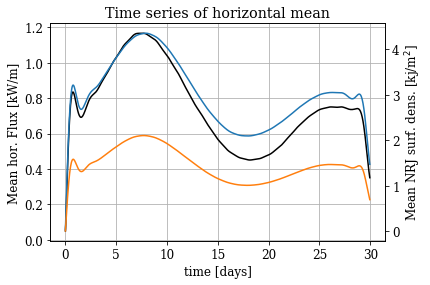

In [95]:
ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
Nt = ncbc.dimensions['time'].size
ekmean = ncbc.variables['ekint_lf'][j1:j2,:,:][:,i1:i2,:].mean(axis=(0,1))
epmean = ncbc.variables['epint_lf'][j1:j2,:,:][:,i1:i2,:].mean(axis=(0,1))
flmean = np.sqrt((ncbc.variables['puint_lf'][j1:j2,:,:][:,i1:i2,:]**2 \
                  + ncbc.variables['pvint_lf'][j1:j2,:,:][:,i1:i2,:]**2)).mean(axis=(0,1))
ncbc.close()

times = np.arange(Nt)/24.

fig = plt.figure()
ax = plt.gca()

ax.plot(times, flmean, "k")
ax.set_xlabel('time [days]')
ax.set_ylabel(r'Mean hor. Flux [kW/m]')

axb = plt.twinx(ax)
axb.plot(times, ekmean, times, epmean)
axb.set_ylabel(r'Mean NRJ surf. dens. [kj/m$^2$]')

ax.grid(True)

plt.title('Time series of horizontal mean')

if dosavefig:
    fig.savefig(dirpic+simul+"_MeanBclinNRJ_tseries.pdf", magnification="auto", bbox_inches="tight")

In [12]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=0)



total conversion is 17.71 GW
domain averaged: 7.91 mW/m$^2$


/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


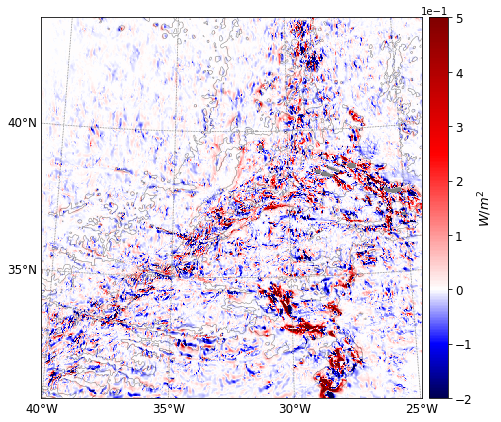

In [13]:
# plot data
toplot = cterm

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

##### bottom-conversion term
hpc = bm.pcolormesh(xx,yy,toplot,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)
hcb = bm.colorbar(hpc)#,extend='both')
hcb.formatter.set_powerlimits((-1, 1))    
hcb.update_ticks()
hcb.ax.tick_params(labelsize=fs)

hcb.set_label(r'$W/m^2$',fontsize=fs+1)

if dosavefig:
    plt.savefig(picdir+"luckym2_Ct_slides.png",magnification='auto',dpi=150,bbox_inches="tight")
    
# total conversion (integrated over the domain)
Ctot = np.nansum(toplot/pm/pn)
print('total conversion is {:.2f} GW'.format(Ctot/1e9))
print(r'domain averaged: {:.2f} mW/m$^2$'.format(Ctot/np.sum(1./pm/pn)*1e3))

In [14]:
# Load data
ncbb = MFDataset(fil_sflux.replace('DIAG','DIAG/NRJ_fluxes'),aggdim='eta_rho')

# load data
cterm = ncbb.variables['Ct_lf'][:,:,it]    
#Fx = np.ma.masked_invalid(ncbc.variables['puint_lf'][:,:,it])
#Fy = np.ma.masked_invalid(ncbc.variables['pvint_lf'][:,:,it])
#divflux = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


## Make video of energy with quiver of lowf flux

In [36]:
dosavideo = True

<IPython.core.display.Javascript object>


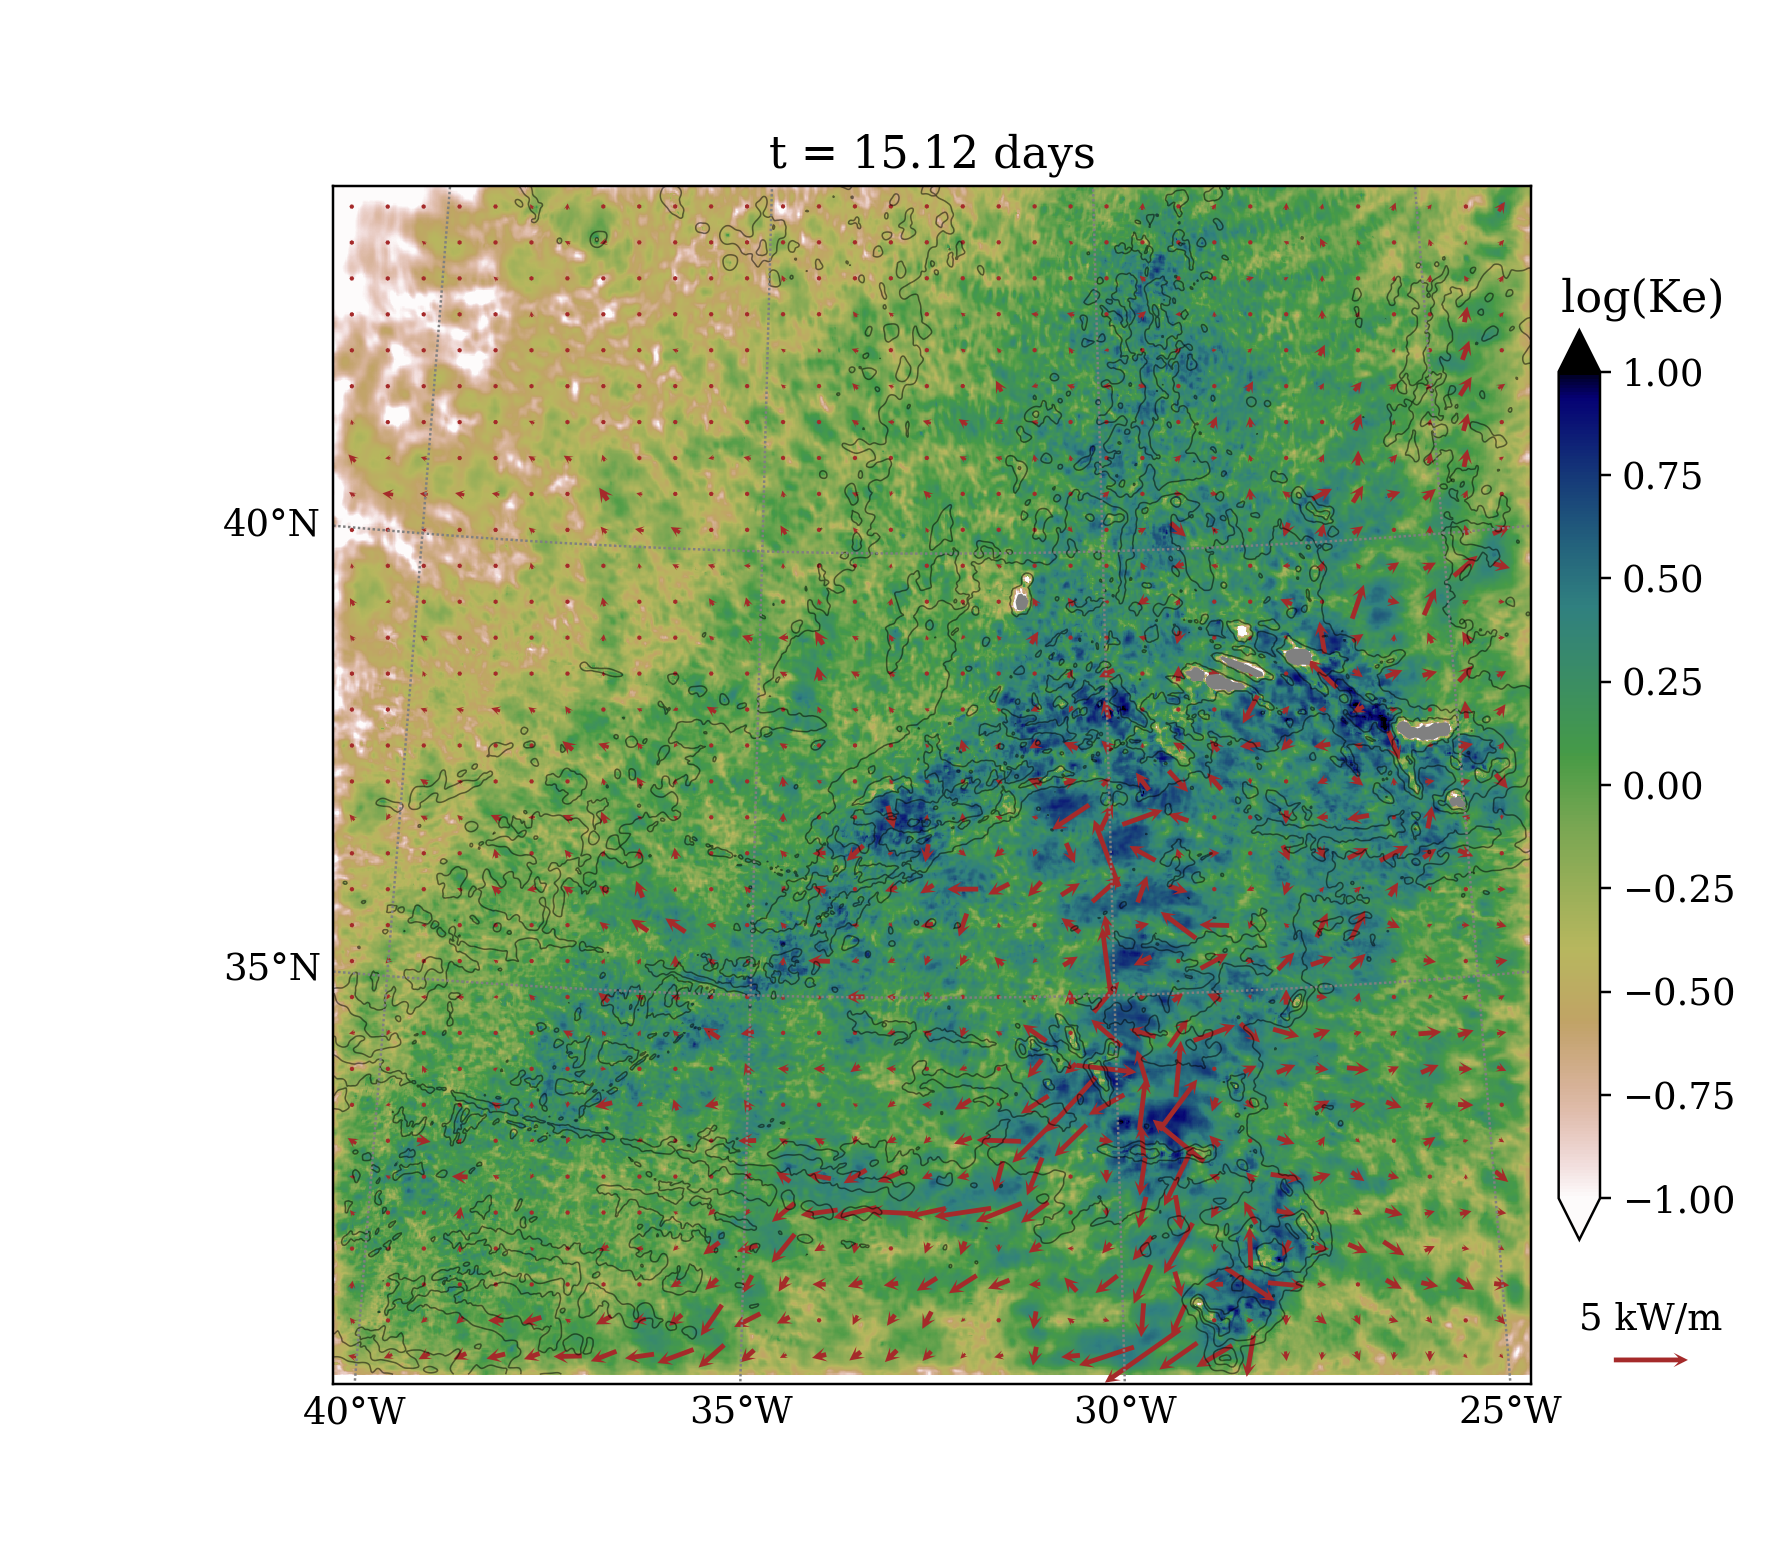

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [38]:
# plot data
vmin, vmax = -1, 1
cmap = "gist_earth_r"
nsq = 30

Nt = data.shape[-1]
times = np.arange(Nt)/24 # WARNING hard-coded
tts = np.arange(Nt)

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

# plot ininitial data
toplot = np.log10(data[:,:,-1])
hpc = bm.pcolormesh(xx, yy, toplot, vmin=vmin, vmax=vmax, cmap=cmap)
hcb = plt.colorbar(hpc, fraction=.03, pad=.02, extend="both")
hcb.ax.set_title(r"         log(Ke)")

# set quiver
usq = 5
slix, sliy = slice(nsq//2,Nx,nsq), slice(nsq//2,Ny,nsq)
hqb = bm.quiver(xx[sliy,slix], yy[sliy,slix], fxbc[sliy,slix,-1], fybc[sliy,slix,-1] \
                , scale=15, scale_units="inches" \
          , color='brown', pivot="mid", angles="xy", width=4e-3 \
                , headlength=3, headwidth=3, headaxislength=2)
hqk = ax.quiverkey(hqb, X=1.1, Y=.02, U=usq \
                   , label=r'{} kW/m'.format(usq))

ax.set_title('t = {:.2f} days'.format(times[0]))

def fanim(it):
    hpc.set_array(np.log10(data[:-1,:-1,it]).ravel())
    hqb.set_UVC(fxbc[sliy,slix,it], fybc[sliy,slix,it])
    ax.set_title('t = {:.2f} days'.format(times[it]))

if dosavideo:
    FuncAnimation(fig, fanim, frames=tts, interval=100, repeat=False, blit=True).save(
        'pictures/videos/{0}_{1}.mp4'.format(simul,what,), dpi=200, writer="ffmpeg")
else:
    ani = FuncAnimation(fig, fanim, frames=tts, interval=100, repeat=False, blit=True)    

<IPython.core.display.Javascript object>


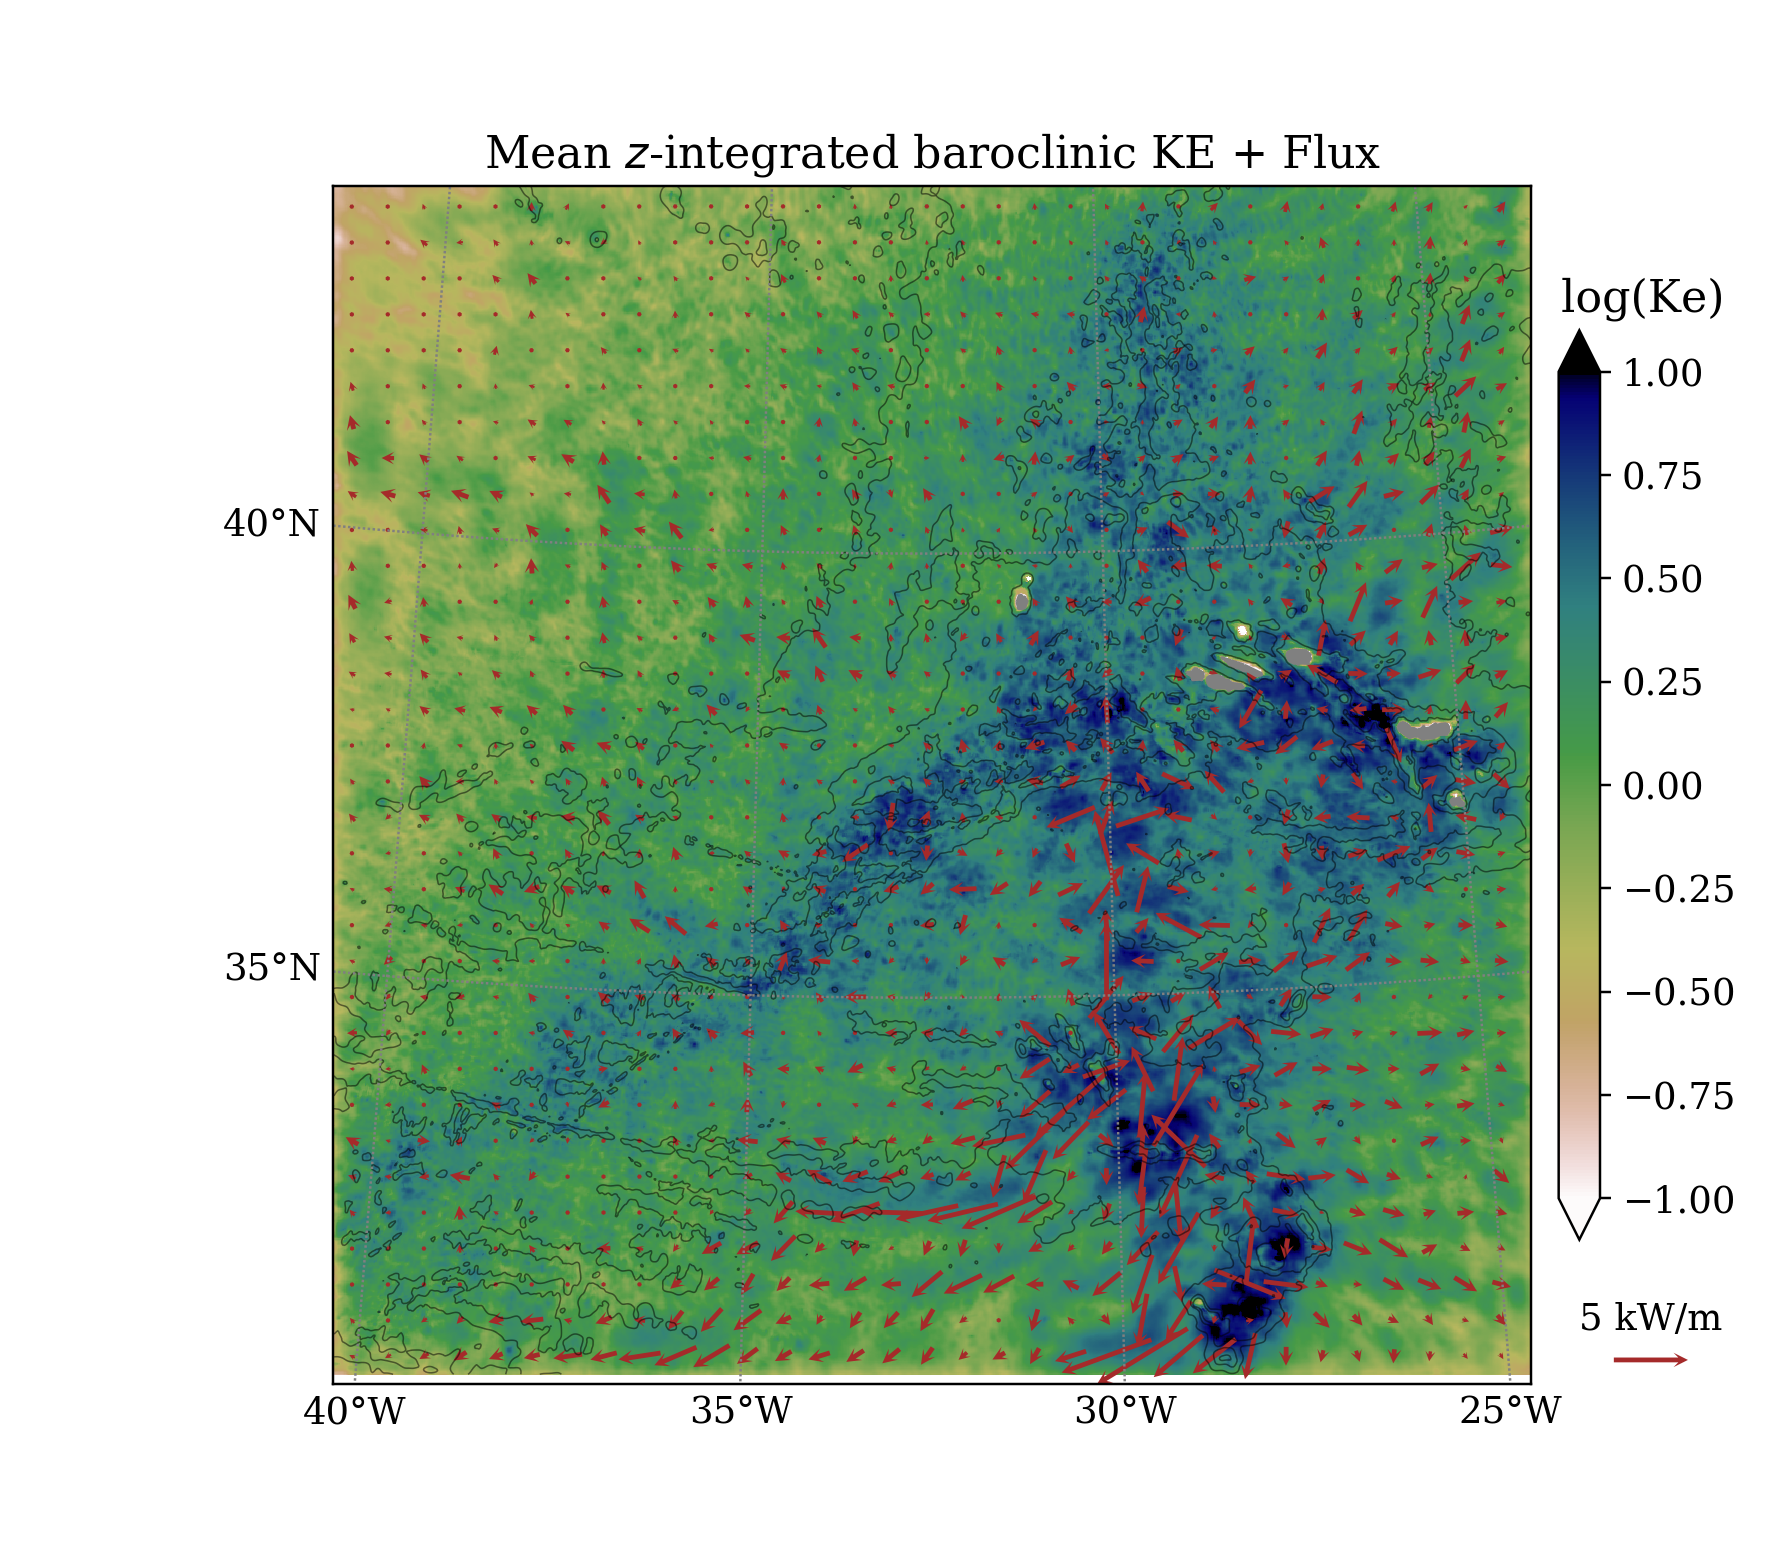

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


In [49]:
# plot data
vmin, vmax = -1, 1
cmap = "gist_earth_r"
nsq = 30

Nt = data.shape[-1]
times = np.arange(Nt)/24 # WARNING hard-coded
tts = np.arange(Nt)

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

# plot ininitial data
toplot = np.log10(davg)
hpc = bm.pcolormesh(xx, yy, toplot, vmin=vmin, vmax=vmax, cmap=cmap)
hcb = plt.colorbar(hpc, fraction=.03, pad=.02, extend="both")
hcb.ax.set_title(r"         log(Ke)")

# set quiver
usq = 5
slix, sliy = slice(nsq//2,Nx,nsq), slice(nsq//2,Ny,nsq)
hqb = bm.quiver(xx[sliy,slix], yy[sliy,slix], fxbc[sliy,slix], fybc[sliy,slix] \
                , scale=15, scale_units="inches" \
          , color='brown', pivot="mid", angles="xy", width=4e-3 \
                , headlength=3, headwidth=3, headaxislength=2)
hqk = ax.quiverkey(hqb, X=1.1, Y=.02, U=usq \
                   , label=r'{} kW/m'.format(usq))

ax.set_title('Mean $z$-integrated baroclinic KE + Flux')

fig.savefig("pictures/{}_ek-flux_avg.png".format(simul),magnification='auto',dpi=150,bbox_inches="tight")

In [50]:
simul

'luckyto'